In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
churnData = pd.read_csv("data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Data Cleaning

In [3]:
# Lowering
churnData.columns = churnData.columns.str.lower()

In [4]:
# Data exploration
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [5]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [6]:
churnData.monthlycharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1585, dtype: int64

In [7]:
# Cleaning null values
sum(churnData.totalcharges == " ")

11

In [8]:
churnData.totalcharges.where(churnData.totalcharges != " ", 0, inplace=True)
sum(churnData.totalcharges == " ")

0

In [9]:
churnData.totalcharges = pd.to_numeric(churnData.totalcharges)
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [10]:
# Replacing nulls with mean

mean_totalcharges = np.mean(churnData.totalcharges)
mean_totalcharges

2279.734303563826

In [11]:
sum(churnData.totalcharges == 0)

11

In [12]:
churnData.totalcharges.where(churnData.totalcharges != 0, mean_totalcharges, inplace=True)

In [13]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
churnData.gender.unique()
churnData.seniorcitizen.unique()
churnData.partner.unique()
churnData.dependents.unique()
churnData.phoneservice.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
churnData.onlinesecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64

In [16]:
churnData.onlinebackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: onlinebackup, dtype: int64

In [17]:
churnData.deviceprotection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64

In [18]:
churnData.techsupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: techsupport, dtype: int64

In [19]:
churnData.streamingtv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streamingtv, dtype: int64

In [20]:
churnData.streamingmovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streamingmovies, dtype: int64

In [21]:
churnData.contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract, dtype: int64

In [22]:
churnData.monthlycharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1585, dtype: int64

In [23]:
churnData.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Getting numerical variables

In [24]:
churnData_num = churnData.select_dtypes(np.number) 
churnData_num

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [25]:
num_all = pd.concat([churnData_num, churnData.churn], axis=1)
num_all

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


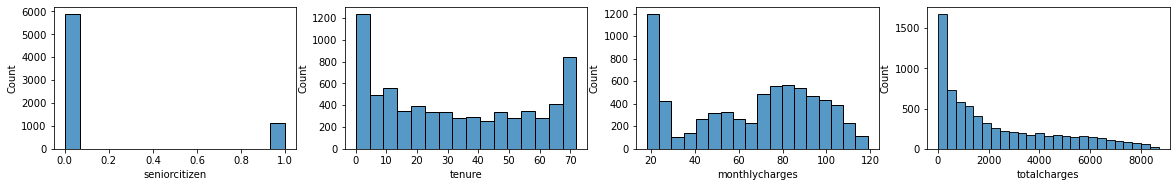

In [26]:
plt.figure(figsize=(20,12))
for i, column in enumerate(churnData_num.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(churnData_num[column])

### Dummifying the categorical variables

In [27]:
categorical = churnData.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [28]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:-1], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelling prep

### X/y split

In [29]:
X = churnData_num
y = churnData.iloc[:,-1]

### Train/test split

In [30]:
## Test/train split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [31]:
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges
877,0,51,60.15,3077.00
5792,1,15,96.30,1426.75
5334,0,49,107.95,5293.20
878,0,60,64.75,4039.50
6578,0,10,73.55,693.30
...,...,...,...,...
79,0,45,25.90,1216.60
3927,0,3,20.55,51.15
5955,0,72,68.40,4855.35
6936,0,5,80.15,385.00


## Log model 
<b>***numerical only!

### Cross validation

In [32]:
model = LogisticRegression() 
print(X_train.shape)

(4930, 4)


In [33]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.80425963, 0.79310345, 0.79006085, 0.79614604, 0.77789047])

In [34]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


### Running the log regression model in train/test sets

In [35]:
#Scaling the data

std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

X_test_scaled = std_scaler.transform(X_test)
X_test_scaled

array([[-0.43814715,  0.71372312, -1.45720263, -0.53917282],
       [-0.43814715,  1.60910697, -1.4803881 , -0.37714322],
       [-0.43814715,  1.24281358,  0.14093819,  0.80663012],
       ...,
       [-0.43814715, -1.23984162, -0.43538617, -0.96844403],
       [-0.43814715, -0.30375851,  1.0319224 ,  0.02268012],
       [-0.43814715,  1.5684077 , -1.4803881 , -0.40124095]])

,Error_metric,Train,Test
0,Accuracy,0.796146,0.781354
1,Precision,0.668552,0.632653
2,Recall,0.453569,0.438163


Confusion matrix for the train set
[[3334  293]
 [ 712  591]]


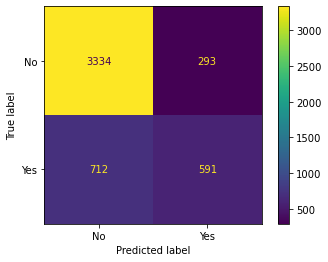



Confusion matrix for the test set
[[1403  144]
 [ 318  248]]


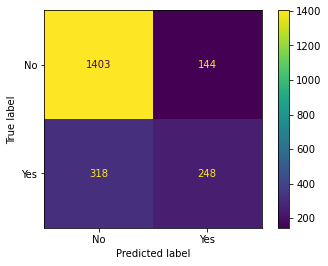

In [36]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [37]:
# Recall less than chance, accuracy ok

## KNN
<b>***numerical only!

### Cross validation

In [38]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

print(X_train.shape)

(4930, 4)


In [39]:
scores=cross_val_score(neigh, X_train, y_train, cv=5)
scores

array([0.73529412, 0.76166329, 0.75659229, 0.73833671, 0.75557809])

In [40]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.01


### Running the model

In [41]:
## Transforming the data

trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.796146,0.781354
1,Precision,0.668552,0.632653
2,Recall,0.453569,0.438163


Confusion matrix for the train set
[[3381  246]
 [ 449  854]]


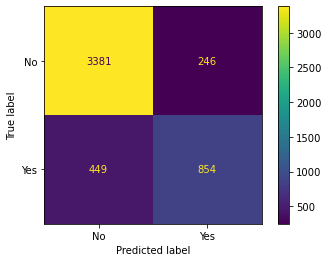



Confusion matrix for the test set
[[1320  227]
 [ 306  260]]


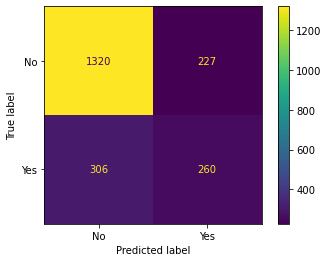

In [42]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

In [43]:
# Again, recall not good, accuracy ok

## Decision Trees 
### Num. only

#### Cross validation

In [44]:
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.80425963, 0.79310345, 0.79006085, 0.79614604, 0.77789047])

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


#### Running the model

,Error_metric,Train,Test
0,Accuracy,0.787830,0.777567
1,Precision,0.667100,0.645455
2,Recall,0.393707,0.376325


Confusion matrix for the train set
[[3371  790]
 [ 256  513]]


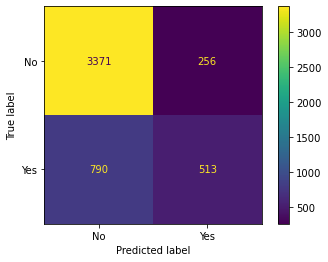



Confusion matrix for the test set
[[1430  353]
 [ 117  213]]


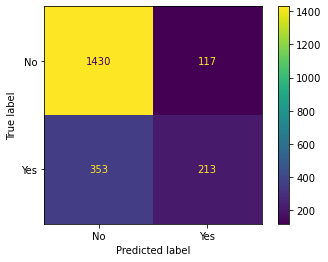

In [46]:
# No scaling

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

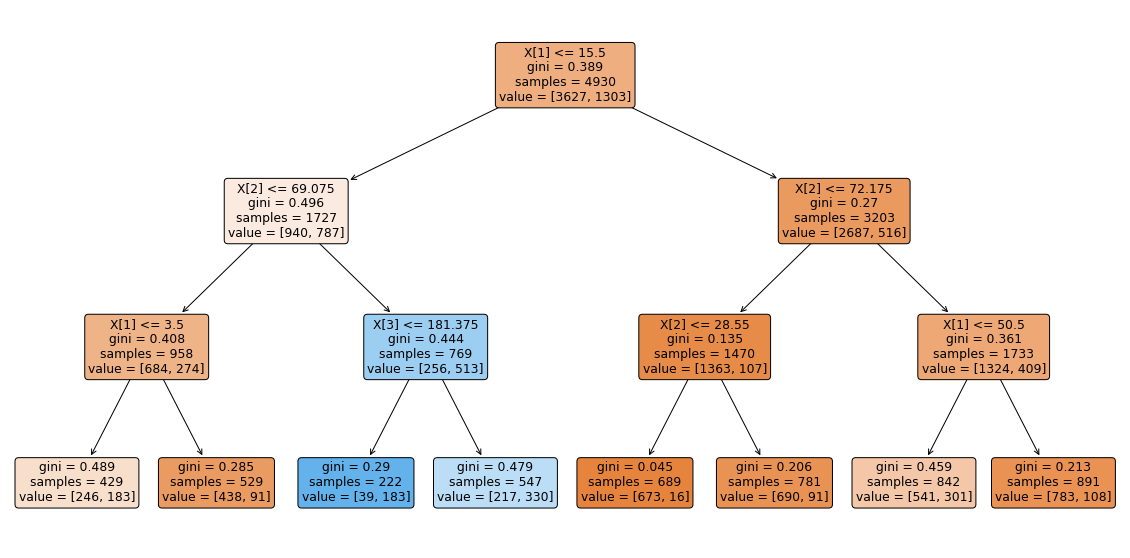

In [47]:
# Decision Tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt,filled = True, rounded=True)
plt.show()  

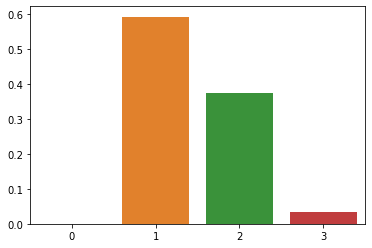

In [48]:
plot = sns.barplot(list(range(4)), dt.feature_importances_)

In [49]:
# Poorest recall out of three (numerical-variable-based) models 

### All variables

#### Building the dataframe with numerical and categorical variables

In [50]:
all_features_dummy = pd.concat([churnData_num, categorical_cols], axis=1)
all_features_dummy

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
all_dummy = pd.concat([all_features_dummy, churnData.churn], axis=1)
all_dummy

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,No
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Yes
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,No
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,No
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,No
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,No
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Yes


#### Test/train split (all variables)

In [52]:
y = churnData.churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7043, dtype: object

In [53]:
X_train, X_test, y_train, y_test = train_test_split(all_features_dummy, y, test_size=.30,random_state=100)
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
877,0,51,60.15,3077.00,0,0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
5792,1,15,96.30,1426.75,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
5334,0,49,107.95,5293.20,0,1,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
878,0,60,64.75,4039.50,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
6578,0,10,73.55,693.30,0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,45,25.90,1216.60,0,1,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0
3927,0,3,20.55,51.15,1,1,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
5955,0,72,68.40,4855.35,1,1,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
6936,0,5,80.15,385.00,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cross validation

In [54]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123)
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.80324544, 0.78803245, 0.78803245, 0.78701826, 0.77180527])

In [55]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


#### Running the model

,Error_metric,Train,Test
0,Accuracy,0.798783,0.772835
1,Precision,0.668108,0.605392
2,Recall,0.474290,0.436396


Confusion matrix for the train set
[[3320  685]
 [ 307  618]]


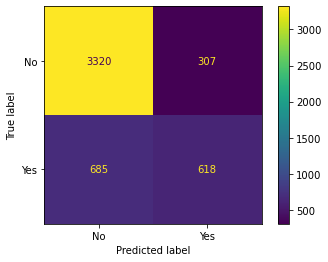



Confusion matrix for the test set
[[1386  319]
 [ 161  247]]


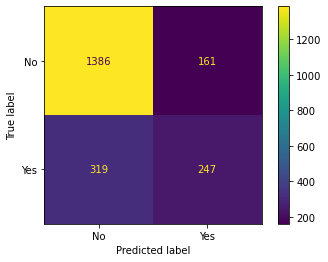

In [56]:
# Max_depth - 5

dt = DecisionTreeClassifier(max_depth=5, random_state=123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [57]:
# Recall somewhat imporoved compared to first iteration, still bad though 

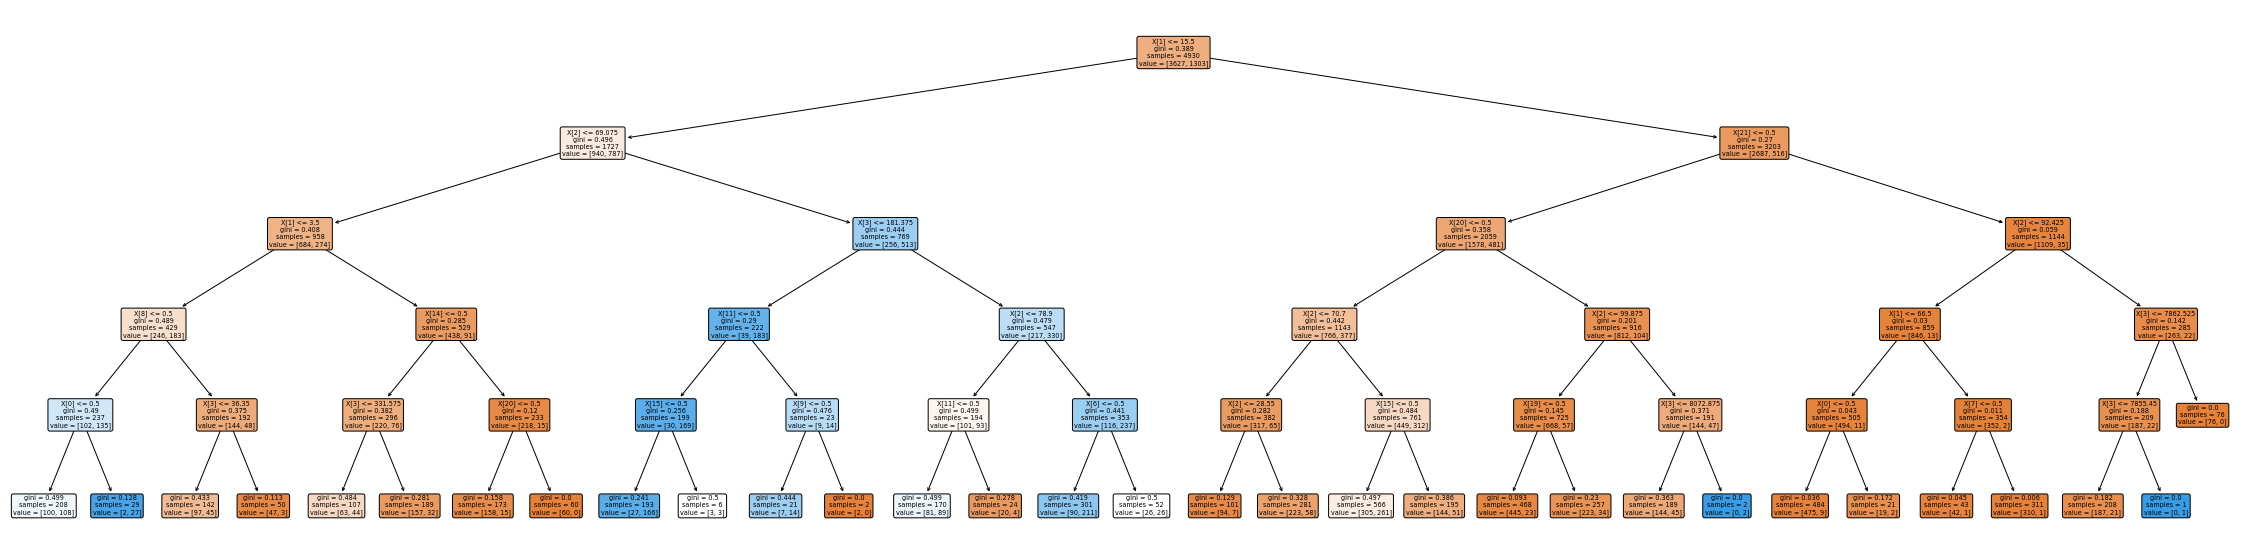

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

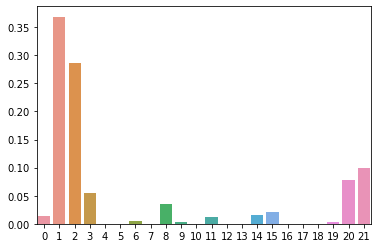

In [59]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

In [60]:
# Most important features are still the 2 numerical ones (1-2), as well as the length of contract (20-21)

## Balancing the dataset I: Downsampling

### Downsampling: all variables

In [61]:
dt.feature_importances_

array([1.44978066e-02, 3.68747417e-01, 2.86582380e-01, 5.46786436e-02,
       0.00000000e+00, 0.00000000e+00, 5.85659871e-03, 4.96032414e-05,
       3.54269236e-02, 2.65345369e-03, 0.00000000e+00, 1.26569956e-02,
       0.00000000e+00, 0.00000000e+00, 1.57753934e-02, 2.13568390e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.75009653e-03,
       7.88731113e-02, 9.90947378e-02])

In [62]:
# Dummifying the target variable in all relevant dataframes

churnData['churn'] = churnData['churn'].apply(lambda x: 0 if x == 'No' else 1)
all_dummy['churn'] = all_dummy['churn'].apply(lambda x: 0 if x == 'No' else 1)
num_all['churn'] = num_all['churn'].apply(lambda x: 0 if x == 'No' else 1)
num_all

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [63]:
# Splitting df 

category_0_all = all_dummy[all_dummy['churn'] == 0]
category_1_all = all_dummy[all_dummy['churn'] == 1]
category_1_all

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,8,99.65,820.50,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
8,0,28,104.80,3046.05,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
13,0,49,103.70,5036.30,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,12,59.80,727.80,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
7026,0,9,44.20,403.35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7032,1,1,75.75,75.75,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7034,0,67,102.95,6886.25,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [64]:
# Filtering df according to minority group 

category_0_all_down = category_0_all.sample(len(category_1_all))
print(category_0_all_down.shape)
print(category_1_all.shape)

(1869, 23)
(1869, 23)


In [65]:
# Putting together the two splits

all_data_down = pd.concat([category_0_all_down, category_1_all], axis=0)
all_data_down = all_data_down.sample(frac=1)
all_data_down['churn'].value_counts()
all_data_down

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn
3846,0,8,45.45,411.75,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6491,0,1,69.20,69.20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
978,1,62,103.75,6383.35,1,1,0,1,0,0,...,1,0,0,0,1,0,1,1,0,1
5288,0,1,79.65,79.65,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
6401,0,3,55.10,154.65,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,32,91.35,2896.55,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4837,0,1,69.80,69.80,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
687,1,2,49.25,91.10,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5550,1,21,20.50,429.55,1,0,0,1,1,0,...,0,1,0,1,0,1,0,1,0,0


### Downsampling: numerical only

In [66]:
num_all.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [67]:
category_0 = num_all[num_all['churn'] == 0]
category_1 = num_all[num_all['churn'] == 1]
print(category_1.shape)
print(category_0.shape)

(1869, 5)
(5174, 5)


In [68]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [69]:
num_down = pd.concat([category_0_down, category_1], axis=0)
num_down = num_down.sample(frac=1)
print(num_down['churn'].value_counts())
print(num_down.shape)

0    1869
1    1869
Name: churn, dtype: int64
(3738, 5)


### Rerunning the models with the downsample

#### Log model [num. only]

In [70]:
X = num_down.iloc[:,:-1]
y = num_down.churn
X

,seniorcitizen,tenure,monthlycharges,totalcharges
2011,0,53,85.70,4616.10
2944,0,12,50.95,605.75
2933,0,68,24.00,1664.30
2648,0,35,59.60,2094.90
598,0,51,90.35,4614.55
...,...,...,...,...
4558,1,27,85.25,2287.25
3829,1,43,101.00,4388.40
3360,0,13,83.20,1060.60
4328,0,15,51.10,711.15


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [72]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.731104,0.727273
1,Precision,0.719045,0.703980
2,Recall,0.762159,0.769022


Confusion matrix for the train set
[[1042  447]
 [ 357 1144]]


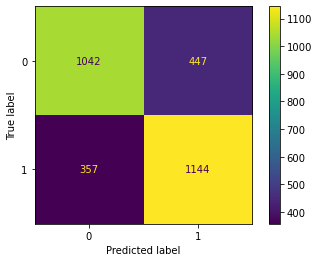



Confusion matrix for the test set
[[261 119]
 [ 85 283]]


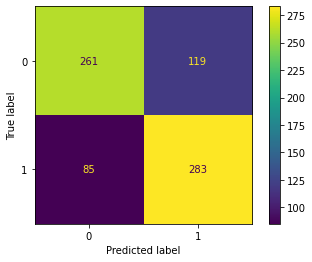

In [73]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [74]:
# precision and recall improve, less false negatives, test set not overfitted

#### KNN model [num. only]

In [75]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.731104,0.727273
1,Precision,0.719045,0.703980
2,Recall,0.762159,0.769022


Confusion matrix for the train set
[[1220  269]
 [ 254 1247]]


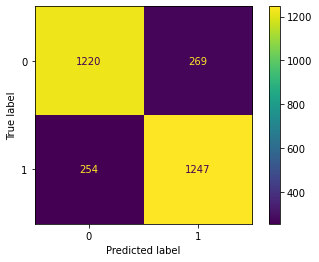



Confusion matrix for the test set
[[247 133]
 [116 252]]


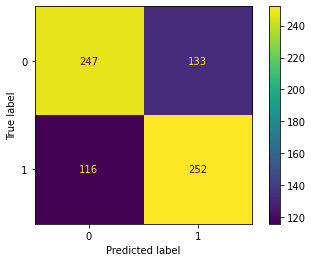

In [76]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

In [77]:
# precision and recall improve, again no overfitting

#### Decision Trees (numerical only)

In [78]:
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges
165,0,69,19.90,1363.45
4348,0,1,19.10,19.10
1225,0,16,49.95,810.20
5290,0,71,59.70,4122.65
1185,0,1,60.15,60.15
...,...,...,...,...
147,0,1,45.65,45.65
6870,0,49,74.60,3720.35
6967,1,25,89.50,2196.15
3721,0,2,20.65,38.70


,Error_metric,Train,Test
0,Accuracy,0.733110,0.713904
1,Precision,0.707620,0.678241
2,Recall,0.798135,0.796196


Confusion matrix for the train set
[[ 994  303]
 [ 495 1198]]


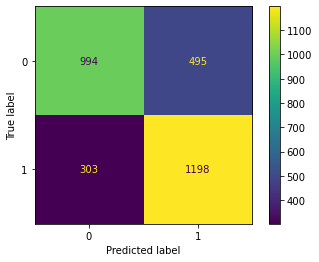



Confusion matrix for the test set
[[241  75]
 [139 293]]


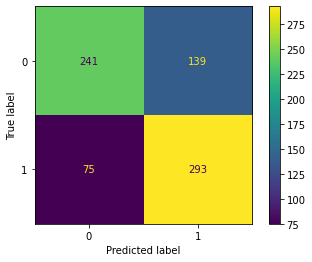

In [79]:
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

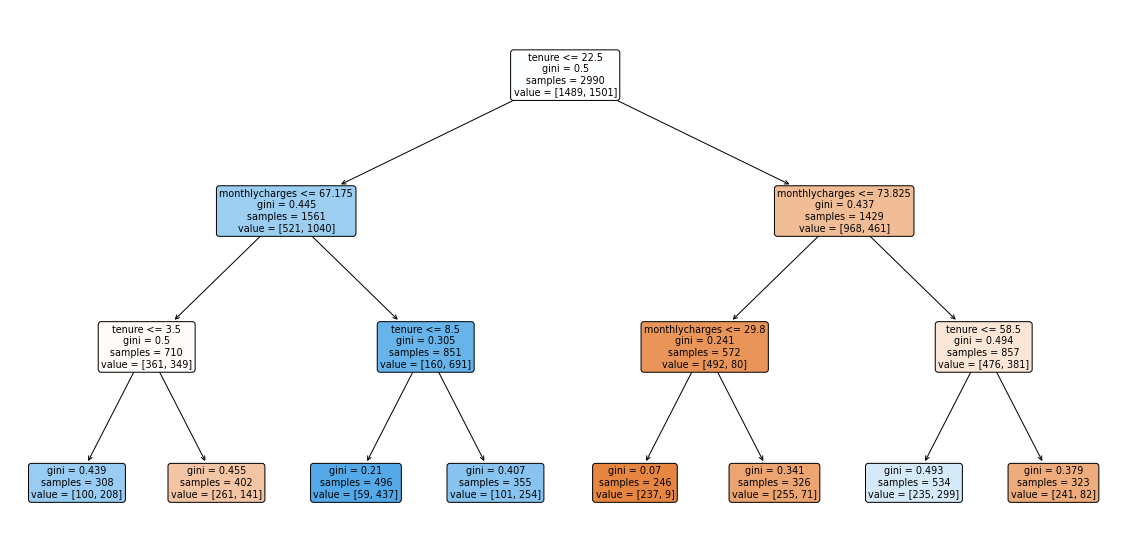

In [80]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt,filled = True, rounded=True, feature_names=X.columns)
plt.show()  

In [81]:
dt.feature_importances_

array([0.        , 0.63222959, 0.36777041, 0.        ])

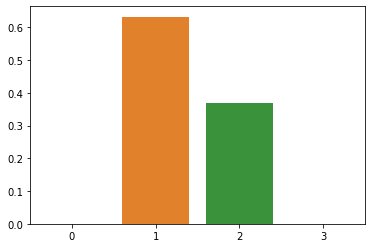

In [82]:
plot = sns.barplot(list(range(4)), dt.feature_importances_)

#### Decision Trees (all variables)

In [83]:
X = all_data_down.iloc[:,:-1]
y = all_data_down.churn
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
3846,0,8,45.45,411.75,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6491,0,1,69.20,69.20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
978,1,62,103.75,6383.35,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
5288,0,1,79.65,79.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6401,0,3,55.10,154.65,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,32,91.35,2896.55,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4837,0,1,69.80,69.80,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
687,1,2,49.25,91.10,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5550,1,21,20.50,429.55,1,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0


###### Train/test split (all variables_downsampled)

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

,Error_metric,Train,Test
0,Accuracy,0.762232,0.738859
1,Precision,0.765258,0.750000
2,Recall,0.752308,0.727592


Confusion matrix for the train set
[[1016  322]
 [ 300  978]]


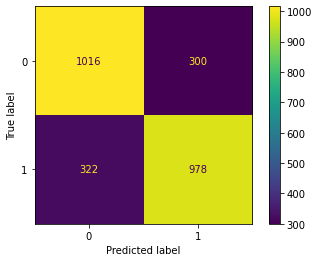



Confusion matrix for the test set
[[415 155]
 [138 414]]


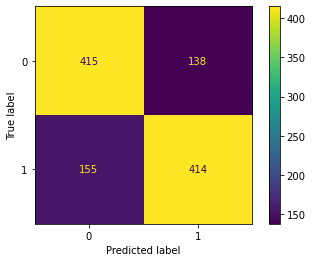

In [85]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123)
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

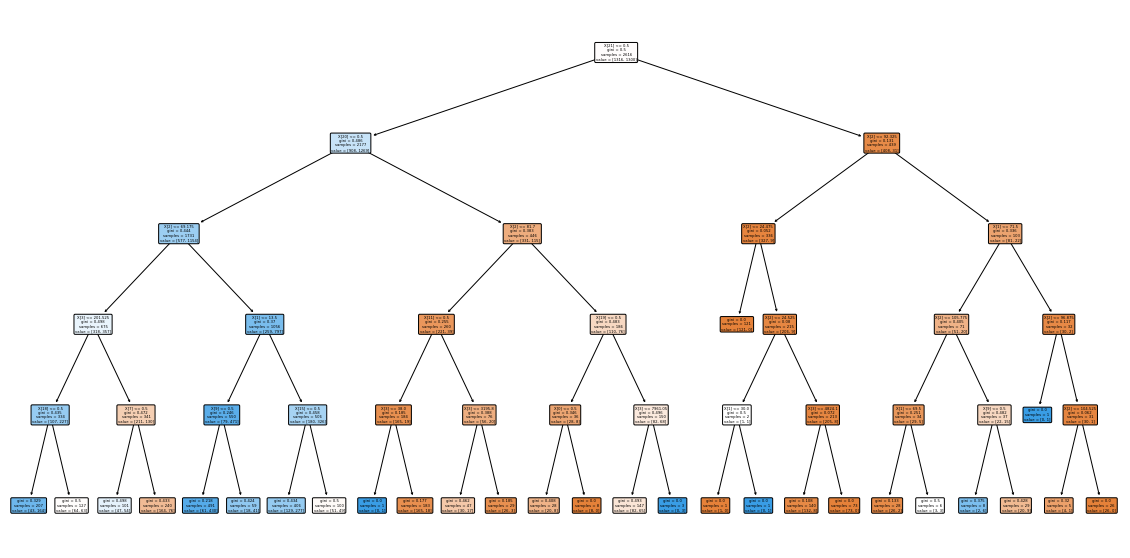

In [86]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt,filled = True, rounded=True)
plt.show()  

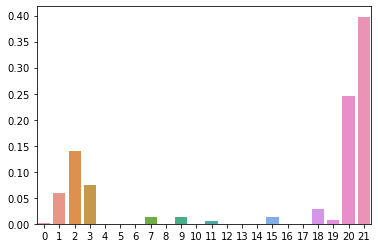

In [87]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

In [88]:
# Length of contract is now the most important feature! People most likely to leave after a two-year contract 

In [89]:
# check num + contract feature

## Balancing the data: upsampling, method 1

### All variables

In [90]:
category_1_up = category_1_all.sample(len(category_0_all), replace=True)
print(category_1_up.shape)
category_1_up

(5174, 23)


,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn
3662,0,9,45.15,416.45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1927,0,47,107.35,5118.95,1,1,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
4664,0,2,74.90,147.15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2488,0,31,55.25,1715.65,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
1263,1,68,89.60,6127.60,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0,2,80.20,181.10,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
6680,0,48,95.50,4627.85,0,0,1,1,0,0,...,1,0,1,0,1,0,0,0,1,1
495,0,22,43.75,903.60,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
5972,1,15,55.00,757.10,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [91]:
all_up = pd.concat([category_0_all, category_1_up], axis=0)
all_up = all_up.sample(frac=1)
all_up.churn.value_counts()

1    5174
0    5174
Name: churn, dtype: int64

### Numerical variables

In [92]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_0.shape)
print(category_1_up.shape)

(5174, 5)
(5174, 5)


In [93]:
num_up = pd.concat([category_0, category_1_up], axis=0)
num_up = num_up.sample(frac=1)
num_up.churn.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

In [94]:
num_up.shape

(10348, 5)

### Rerunning the models with the upsample I

#### Log model [num. only]

In [95]:
X = num_up.iloc[:,:-1]
y = num_up.churn
X

,seniorcitizen,tenure,monthlycharges,totalcharges
4234,0,16,19.05,326.65
5395,0,5,81.00,389.60
5610,0,3,75.50,220.60
3905,0,3,35.20,108.95
3977,0,63,110.10,6705.70
...,...,...,...,...
4645,0,33,104.40,3409.60
7008,1,3,75.05,256.25
2301,0,8,90.25,743.75
5600,0,7,69.95,529.50


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges
6213,0,19,20.15,387.70
3616,1,69,87.30,6055.55
6537,0,70,115.65,7968.85
6355,0,68,110.25,7279.35
3499,0,1,20.90,20.90
...,...,...,...,...
2008,0,4,87.10,341.45
6082,0,59,101.10,6039.90
4298,0,10,46.00,492.10
985,1,33,80.60,2656.50


In [97]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.737255,0.741063
1,Precision,0.724661,0.716228
2,Recall,0.769767,0.779862


Confusion matrix for the train set
[[2900 1217]
 [ 958 3203]]


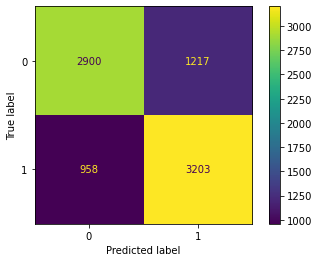



Confusion matrix for the test set
[[744 313]
 [223 790]]


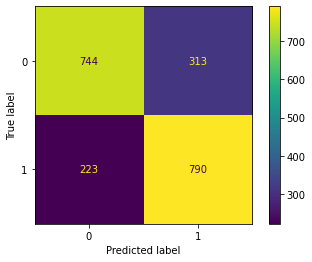

In [98]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [99]:
# Same results as with the downscaled set ??

#### KNN model

In [100]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.737255,0.741063
1,Precision,0.724661,0.716228
2,Recall,0.769767,0.779862


Confusion matrix for the train set
[[3394  723]
 [ 148 4013]]


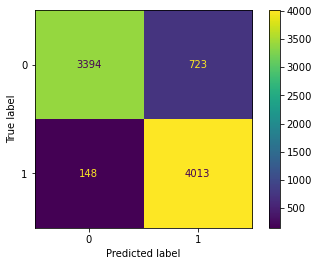



Confusion matrix for the test set
[[741 316]
 [112 901]]


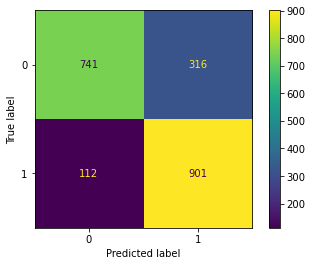

In [101]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

In [102]:
# Downscaled version of KNN is better!

#### Decision Trees (numerical only)

,Error_metric,Train,Test
0,Accuracy,0.730611,0.725604
1,Precision,0.686138,0.669718
2,Recall,0.855323,0.866732


Confusion matrix for the train set
[[2489  602]
 [1628 3559]]


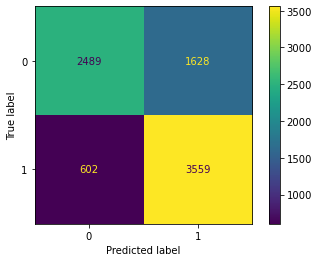



Confusion matrix for the test set
[[624 135]
 [433 878]]


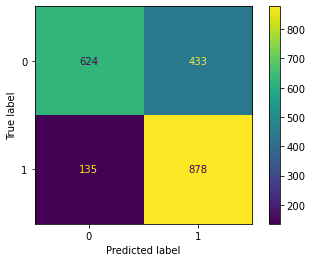

In [103]:
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

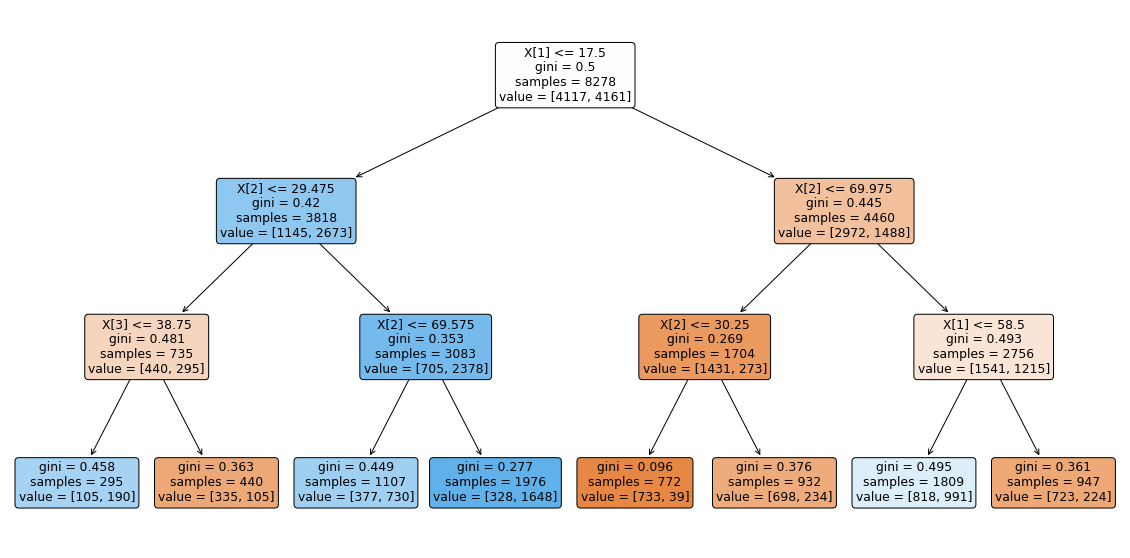

In [104]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt,filled = True, rounded=True)
plt.show()  

In [105]:
dt.feature_importances_

array([0.        , 0.59211104, 0.35680965, 0.05107932])

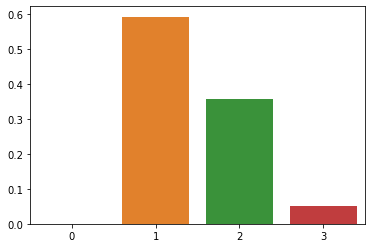

In [106]:
plot = sns.barplot(list(range(4)), dt.feature_importances_)

#### Decision Trees (all variables)

In [107]:
X = all_up.iloc[:,:-1]
y = all_up.churn
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
973,1,44,30.35,1359.70,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,1,10,72.85,688.65,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1040,1,14,90.45,1266.10,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1089,0,16,74.75,1129.35,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3086,0,17,95.65,1640.00,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,0,69,59.75,4069.90,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
299,0,1,73.60,73.60,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3800,0,66,90.95,5930.05,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
505,1,20,94.10,1782.40,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


###### Train/test split (all variables_downsampled)

In [108]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

,Error_metric,Train,Test
0,Accuracy,0.762391,0.746538
1,Precision,0.759671,0.745709
2,Recall,0.766187,0.751923


Confusion matrix for the train set
[[2753  845]
 [ 876 2769]]


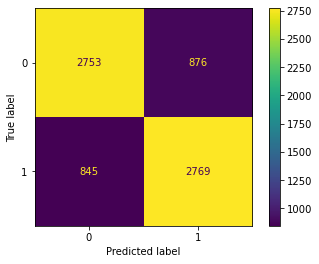



Confusion matrix for the test set
[[1145  387]
 [ 400 1173]]


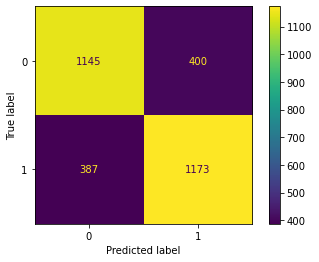

In [109]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123)
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

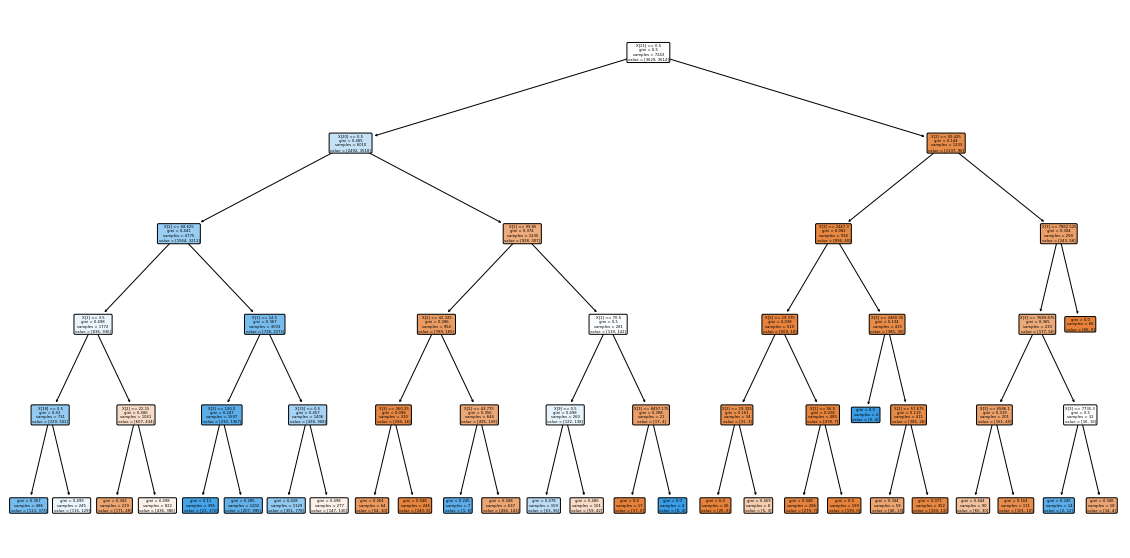

In [110]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt,filled = True, rounded=True)
plt.show()  

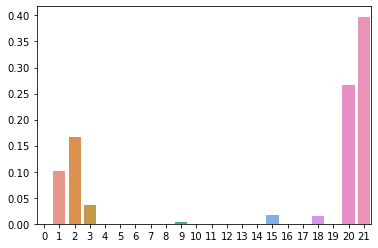

In [111]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

In [112]:
# Again, biggest predictor is length of contract - people tend to leave after 2 years

## Balancing the data: upsampling, method 2

In [113]:
smote = SMOTE()

### All variables

In [114]:
all_dummy

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
X = all_dummy.iloc[:,:-1]
y = all_dummy.churn
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X_sm_all, y_sm_all = smote.fit_resample(X, y)
y_sm_all.value_counts()
X_sm_all.shape

(10348, 22)

### Numerical variables

In [117]:
num_all.churn.value_counts()
X_all = num_all.iloc[:,:-1]
y_all = num_all.churn
X_all

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [118]:
X_sm_num, y_sm_num = smote.fit_resample(X_all, y_all)
y_sm_num.value_counts()
X_sm_num.shape

(10348, 4)

### FINISH -- Rerunning the models with the upsample II: SMOTE

In [119]:
# smote is only on numerical, based on the downsampling of the numerical variables

In [120]:
num_down

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
2011,0,53,85.70,4616.10,0
2944,0,12,50.95,605.75,0
2933,0,68,24.00,1664.30,0
2648,0,35,59.60,2094.90,0
598,0,51,90.35,4614.55,0
...,...,...,...,...,...
4558,1,27,85.25,2287.25,1
3829,1,43,101.00,4388.40,1
3360,0,13,83.20,1060.60,1
4328,0,15,51.10,711.15,0


In [121]:
X = churnData_num.iloc[:,:-1]
y = churnData_num.churn
X
y.value_counts()

AttributeError: 'DataFrame' object has no attribute 'churn'

In [ ]:
smote = SMOTE()

In [ ]:
X_sm_num, y_sm_num = smote.fit_resample(X, y)

In [ ]:
X_sm_num
y_sm_num

## 2nd iteration: numerical + contract length only

### Downsampling

In [122]:
num_all_best = num_all.iloc[:,1:4]
num_all_best

,tenure,monthlycharges,totalcharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [123]:
contract = all_dummy.iloc[:,20:22]

In [124]:
selected_features = pd.concat([num_all_best, contract, num_all.churn], axis=1)
selected_features

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year,churn
0,1,29.85,29.85,0,0,0
1,34,56.95,1889.50,1,0,0
2,2,53.85,108.15,0,0,1
3,45,42.30,1840.75,1,0,0
4,2,70.70,151.65,0,0,1
...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,0
7039,72,103.20,7362.90,1,0,0
7040,11,29.60,346.45,0,0,0
7041,4,74.40,306.60,0,0,1


In [125]:
category_0_slc = selected_features[selected_features['churn'] == 0]
category_1_slc = selected_features[selected_features['churn'] == 1]
category_1_slc

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year,churn
2,2,53.85,108.15,0,0,1
4,2,70.70,151.65,0,0,1
5,8,99.65,820.50,0,0,1
8,28,104.80,3046.05,0,0,1
13,49,103.70,5036.30,0,0,1
...,...,...,...,...,...,...
7021,12,59.80,727.80,1,0,1
7026,9,44.20,403.35,0,0,1
7032,1,75.75,75.75,0,0,1
7034,67,102.95,6886.25,0,0,1


In [127]:
category_0_slc

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year,churn
0,1,29.85,29.85,0,0,0
1,34,56.95,1889.50,1,0,0
3,45,42.30,1840.75,1,0,0
6,22,89.10,1949.40,0,0,0
7,10,29.75,301.90,0,0,0
...,...,...,...,...,...,...
7037,72,21.15,1419.40,0,1,0
7038,24,84.80,1990.50,1,0,0
7039,72,103.20,7362.90,1,0,0
7040,11,29.60,346.45,0,0,0


In [130]:
category_0_slc_down = category_0_slc.sample(len(category_1_slc))
category_0_slc_down

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year,churn
6296,31,50.40,1580.10,1,0,0
4966,19,50.10,910.45,0,0,0
2621,71,79.10,5564.85,0,1,0
4551,56,96.95,5432.20,0,0,0
3321,64,25.55,1714.95,0,1,0
...,...,...,...,...,...,...
3022,2,19.95,38.15,0,0,0
6234,58,25.30,1474.35,0,1,0
739,72,89.85,6697.35,0,1,0
2600,1,70.10,70.10,0,0,0


In [131]:
slc_data_down = pd.concat([category_0_slc_down, category_1_slc], axis=0)
slc_data_down = slc_data_down.sample(frac=1)
slc_data_down['churn'].value_counts()
slc_data_down

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year,churn
6954,15,19.80,309.40,0,0,0
969,2,96.00,174.80,0,0,1
646,1,45.70,45.70,0,0,1
4747,35,20.60,754.00,1,0,0
6334,67,104.00,7039.05,0,1,0
...,...,...,...,...,...,...
3420,26,69.50,1800.05,0,0,0
5650,39,59.80,2343.85,1,0,0
6868,13,91.10,1135.70,0,0,1
2731,63,108.25,6780.10,0,0,0


In [132]:
# X/y split

In [134]:
X = slc_data_down.iloc[:,:-1]
y = slc_data_down.churn
X
y

6954    0
969     1
646     1
4747    0
6334    0
       ..
3420    0
5650    0
6868    1
2731    0
3043    1
Name: churn, Length: 3738, dtype: int64

In [135]:
# Train-test split

In [137]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)
X_train

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year
4340,5,48.65,235.20,0,0
1883,35,100.50,3653.35,0,0
6151,9,71.00,672.55,0,0
4716,66,66.90,4370.25,0,1
6820,59,93.35,5386.50,0,0
...,...,...,...,...,...
5573,1,69.85,69.85,0,0
1323,71,24.65,1710.15,0,1
2761,10,34.70,329.80,0,0
4458,38,94.65,3624.30,0,0


### Running the models 2.0

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.757645,0.745989
1,Precision,0.737216,0.729642
2,Recall,0.797235,0.790123


Confusion matrix for the train set
[[ 944  370]
 [ 264 1038]]


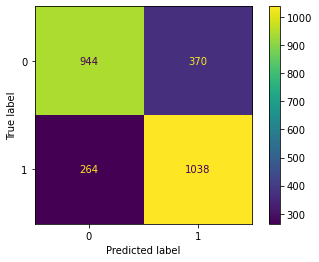



Confusion matrix for the test set
[[389 166]
 [119 448]]


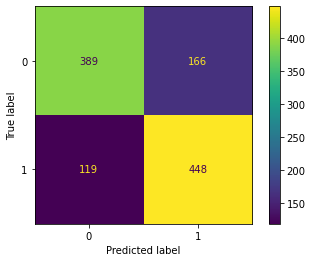

In [139]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

#### KNN

In [140]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.757645,0.745989
1,Precision,0.737216,0.729642
2,Recall,0.797235,0.790123


Confusion matrix for the train set
[[1103  211]
 [ 249 1053]]


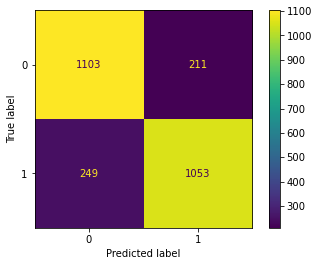



Confusion matrix for the test set
[[387 168]
 [166 401]]


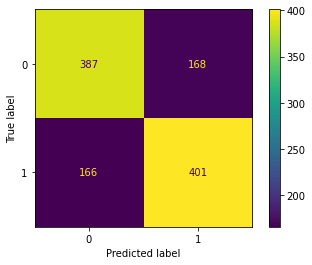

In [141]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

#### Decision trees

,Error_metric,Train,Test
0,Accuracy,0.727446,0.744207
1,Precision,0.663158,0.679949
2,Recall,0.919355,0.932981


Confusion matrix for the train set
[[ 706  105]
 [ 608 1197]]


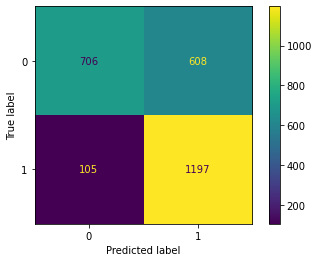



Confusion matrix for the test set
[[306  38]
 [249 529]]


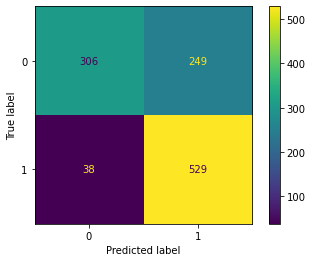

In [142]:
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

## Random forests 
(Numerical + contract length, downsampled)

In [143]:
X_train

,tenure,monthlycharges,totalcharges,contract_One year,contract_Two year
4340,5,48.65,235.20,0,0
1883,35,100.50,3653.35,0,0
6151,9,71.00,672.55,0,0
4716,66,66.90,4370.25,0,1
6820,59,93.35,5386.50,0,0
...,...,...,...,...,...
5573,1,69.85,69.85,0,0
1323,71,24.65,1710.15,0,1
2761,10,34.70,329.80,0,0
4458,38,94.65,3624.30,0,0


In [144]:
y_train

4340    0
1883    1
6151    1
4716    0
6820    0
       ..
5573    1
1323    0
2761    1
4458    1
4320    0
Name: churn, Length: 2616, dtype: int64

In [147]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8803516819571865
0.7468805704099821


In [148]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.72137405, 0.71701721, 0.74952199, 0.77820268, 0.74760994])

In [149]:
np.mean(cross_val_scores)

0.7427451724490243

## Tuning the hyper paramters with gridsearch

In [150]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'max_depth': [5, 8, 10],
    'bootstrap': [True, False],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt', 'log2']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [151]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [152]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [153]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 50}

In [154]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=500, min_samples_leaf =1, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8853211009174312
0.7468805704099821


In [155]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096107,0.009149,0.008923,0.002432,True,5,sqrt,1,50,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",...,0.755356,0.008844,23,0.787285,0.783564,0.784520,0.780698,0.781175,0.783448,0.002392
1,0.200742,0.008120,0.010949,0.002438,True,5,sqrt,1,100,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",...,0.758032,0.011149,7,0.785373,0.785475,0.786431,0.776398,0.783086,0.783353,0.003647
2,0.971845,0.019445,0.057272,0.003481,True,5,sqrt,1,500,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",...,0.756119,0.010801,19,0.785373,0.790731,0.784520,0.777831,0.779264,0.783544,0.004624
3,0.102445,0.005900,0.005418,0.001095,True,5,sqrt,2,50,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",...,0.756502,0.009914,17,0.785851,0.783564,0.781175,0.780220,0.787864,0.783735,0.002845
4,0.202661,0.003101,0.013097,0.003603,True,5,sqrt,2,100,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",...,0.758413,0.009860,5,0.783939,0.786909,0.784998,0.778786,0.784042,0.783735,0.002694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.288352,0.002831,0.016666,0.003009,False,10,log2,1,100,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",...,0.728209,0.016044,71,0.917782,0.910655,0.906832,0.903966,0.918299,0.911507,0.005744
68,1.533790,0.067142,0.067537,0.004561,False,10,log2,1,500,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",...,0.732415,0.013644,67,0.918738,0.913043,0.904443,0.906355,0.920210,0.912558,0.006345
69,0.167144,0.015111,0.010249,0.004350,False,10,log2,2,50,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",...,0.738912,0.013097,61,0.897706,0.889154,0.888199,0.882465,0.902054,0.891916,0.007029
70,0.315962,0.019223,0.015358,0.004232,False,10,log2,2,100,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",...,0.738531,0.011076,63,0.897706,0.891065,0.884376,0.885332,0.900143,0.891725,0.006355


In [156]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7163566435611711


### Feature importance

In [157]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [158]:
len(X_train.columns)

5

In [159]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [160]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
1,monthlycharges,0.341306
2,totalcharges,0.300455
0,tenure,0.216709
4,contract_Two year,0.100596
3,contract_One year,0.040933


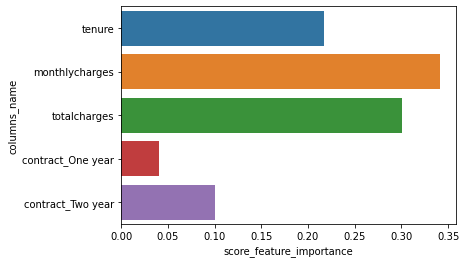

In [163]:
plot = sns.barplot(x=df.score_feature_importance, y=df.columns_name)
#plt.gcf().set_size_inches(15,9)